Learn on how to build and optimize model with **gradient boosting.**

#Introduction
By definition, **ensemble methods** combine the predictions of several models (e.g., several trees, in the case of random forest).

Now, we'll learn about another ensemble method called gradient boosting.

#Difference of Decision Tree, Random Forest, and XGBoost

1. Decision Tree:
A decision tree is a simple and interpretable model that recursively splits the data into subsets based on the feature values. It forms a tree-like structure where each internal node represents a test on a feature, each branch represents the outcome of that test, and each leaf node represents the final prediction. The decision tree makes binary decisions at each node to split the data. It is prone to overfitting, especially when the tree becomes deep, capturing noise and leading to poor generalization on unseen data.

2. Random Forest:
Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions through voting (for classification) or averaging (for regression). Each decision tree is trained on a random subset of the data (bootstrap sample) and a random subset of the features. This randomness reduces overfitting and increases the model's ability to generalize to new data.

3. XGBoost (Extreme Gradient Boosting):
XGBoost is an optimized implementation of the Gradient Boosting algorithm. It creates an ensemble of weak learners (usually shallow decision trees) sequentially, where each new model corrects the errors made by the previous one. XGBoost uses a gradient-based optimization algorithm to minimize a loss function while adding new trees to the ensemble. It also includes regularization terms to control overfitting and speed up the training process. XGBoost is known for its high performance, scalability, and efficiency, making it popular in various machine learning competitions and real-world applications.
**XGBoost** is an implementation of gradient boosting with several additional features focused on perfmance and speed. The final result of an XGBoost model is a weighted sum of the predictions made by all the individual trees in the sequence. The contribution of each tree is adjusted during training based on how well it reduces the overall error.


Note:

* Regularization (penyederhanaan): XGBoost introduces regularization terms to control overfitting during the training process. Regularization helps prevent the model from becoming too complex and ensures better generalization to unseen data.


#Gradient Boosting

**Gradient boosting** is a method that goes through cycles to iteratively add models into an ensemble (setelan).

It begins by initializing the ensemble with a single model, whose predictions can be pretty naive. (Even if its predictions are wildly inaccurate, subsequent (kemudian) additions to the ensemble will address those errors.)

Then, we start the cycle:
1. First, we use the current ensemble to generate predictions for each observation in the dataset. To make a prediction, we **add the predictions from all models** in the ensemble.
2. These predictions are used to calculate a loss function (like mean squared error, for instance).
3. Then, we use the loss function to fit a new model that will be added to the ensemble. Specifically, we determine model parameters so that adding this new model to the ensemble will reduce the loss.
4. Finally, we add the new model to ensemble, and ...
5. Repeat!

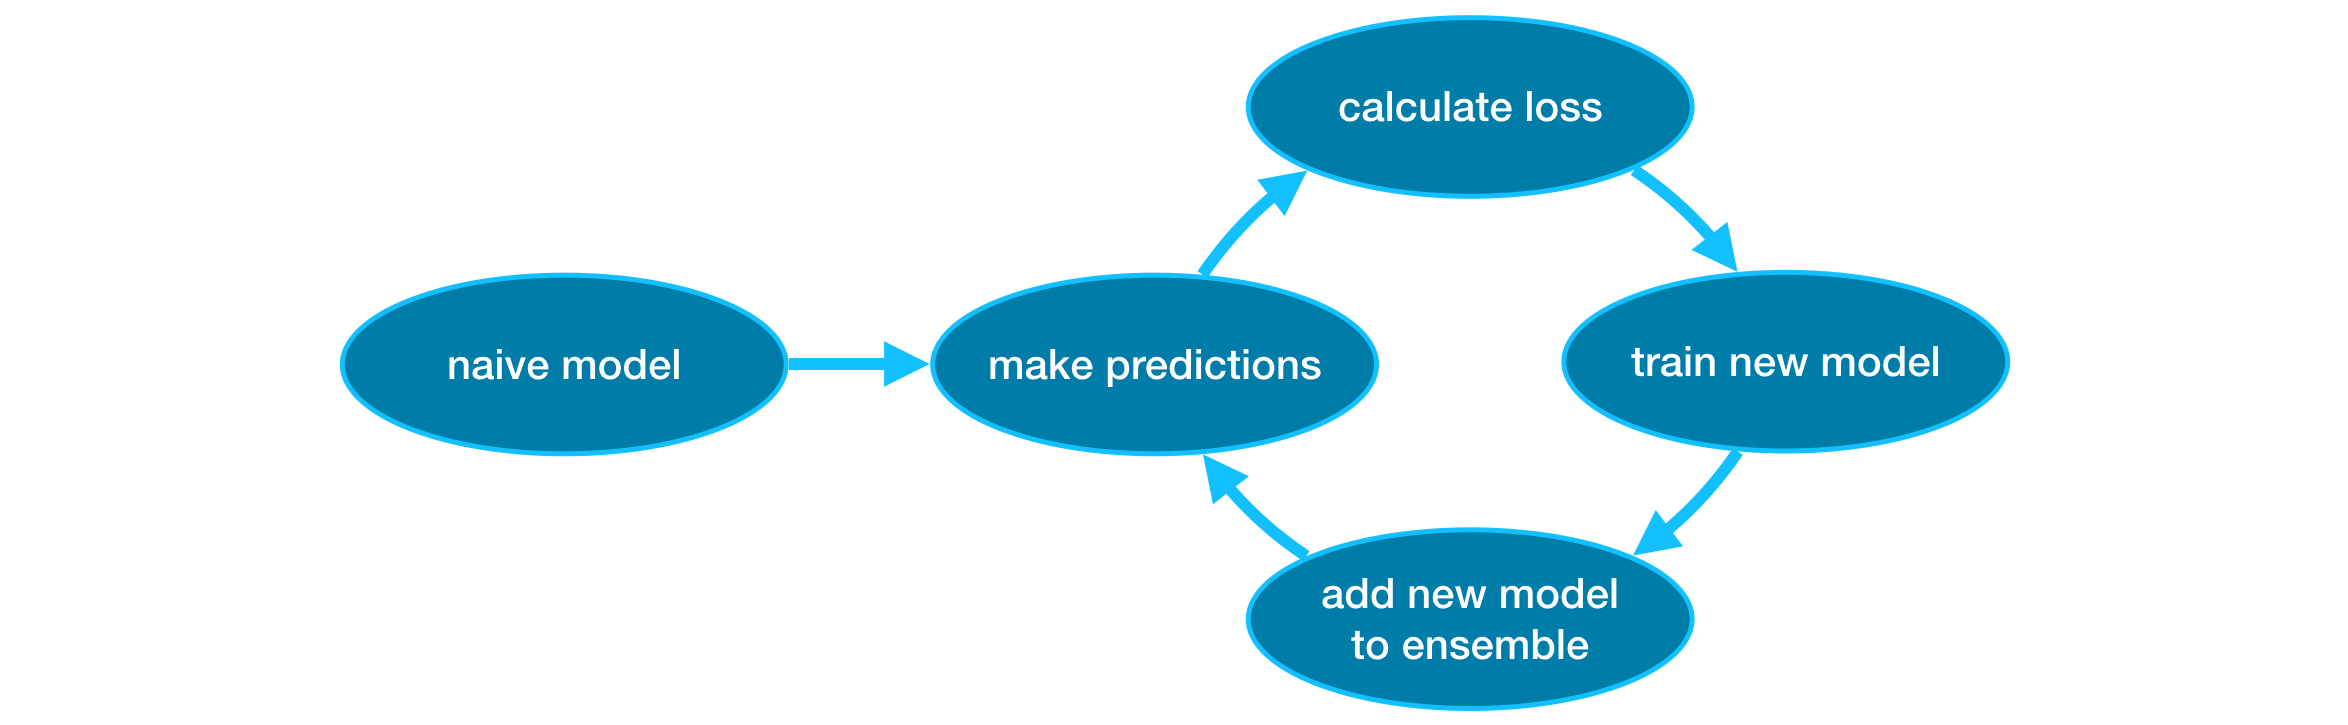

#Example
We begin by loading the training and validation data in X_train, X_valid, y_train, y_valid.

In [7]:
import pandas as pd  # Digunakan untuk pengolahan dan manipulasi data.
from sklearn.model_selection import train_test_split  # Memisahkan data menjadi set pelatihan dan pengujian untuk model.
from xgboost import XGBRegressor  # Algoritma machine learning yang digunakan untuk prediksi berbasis regresi.
from xgboost import plot_tree  # Menampilkan struktur internal dari model XGBoost.
from sklearn.metrics import mean_absolute_error  # Alat untuk mengevaluasi seberapa akurat model dalam membuat prediksi.
import matplotlib.pyplot as plt  # Library untuk membuat grafik dan visualisasi.
from sklearn.model_selection import learning_curve  # Menganalisis bagaimana performa model meningkat seiring jumlah data pelatihan.
import numpy as np  # Library untuk operasi matematis dan manipulasi array.
import shap  # Menyediakan wawasan tentang fitur mana yang paling memengaruhi hasil prediksi.
from sklearn.inspection import PartialDependenceDisplay  # Menampilkan hubungan antara fitur dan hasil model.

**Prompt:**

Write a code cell to mount Google Drive in Colab.

In [8]:
from google.colab import drive
drive.mount('/content/drive')
#Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Prompt:**

Write a code cell to read a CSV file from Google Drive into a DataFrame.

In [9]:
from google.colab import drive
drive.mount('/content/drive')
# Menghubungkan Google Drive ke Google Colab

file_path = '/content/drive/MyDrive/melb_data.csv'
df = pd.read_csv(file_path)
# Membuka file CSV dan memuatnya ke dalam DataFrame

df.head()
# Menampilkan beberapa data awal dari DataFrame

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


**Prompt:**

Write a code cell to select a subset of predictors ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt'] and set the target variable ['Price'] from the DataFrame.

In [10]:
predictors = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
target = 'Price'
# Menentukan kumpulan kolom prediktor dan target

X = df[predictors]
y = df[target]
# Membuat DataFrame untuk fitur (X) dan target (y)

X.head(), y.head()
# Menampilkan lima data pertama untuk memverifikasi pemilihan yang sesuai


(   Rooms  Distance  Landsize  BuildingArea  YearBuilt
 0      2       2.5     202.0           NaN        NaN
 1      2       2.5     156.0          79.0     1900.0
 2      3       2.5     134.0         150.0     1900.0
 3      3       2.5      94.0           NaN        NaN
 4      4       2.5     120.0         142.0     2014.0,
 0    1480000.0
 1    1035000.0
 2    1465000.0
 3     850000.0
 4    1600000.0
 Name: Price, dtype: float64)

**Prompt:**

Write a code cell to split the data into training and validation

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
# Membagi dataset menjadi data pelatihan dan data validasi

print(f"Training Set: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Validation Set: X_valid: {X_valid.shape}, y_valid: {y_valid.shape}")
# Menampilkan dimensi dari setiap subset data


Training Set: X_train: (10864, 5), y_train: (10864,)
Validation Set: X_valid: (2716, 5), y_valid: (2716,)


In the next code cell, we import the scikit-learn API for XGBoost (`xgboost.XGBRegressor`). As you'll see in the output, the `XGBRegressor` class has many tunable parameters.


**Prompt:**

Write a code cell to train the model using XGBoost, and print the mean absolute error on the validation set.

In [12]:
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, random_state=42)
# Membuat model regresi dengan algoritma XGBoost

model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=False)
# Melatih model menggunakan data latih tanpa menerapkan early stopping

y_pred = model.predict(X_valid)
# Menghasilkan prediksi berdasarkan data validasi

mae = mean_absolute_error(y_valid, y_pred)
print(f"Mean Absolute Error (MAE) pada validation set: {mae}")
# Menghitung nilai kesalahan rata-rata absolut (MAE) pada data validasi


Mean Absolute Error (MAE) pada validation set: 225972.76253566827


We also make predictions and evaluate the model.

#Parameter Tuning
XGBoost has a few parameters that can dramatically affect accuracy and training speed. The first parameters you should understand are:

`n_estimators`
Specifies how many times to go through the modeling cycle described above. It is equal to the number of models that we include in the ensemble.
* Too low a value causes underfitting, which leads to inaccurate predictions on both training data and test data.
* Too high a value causes overfitting, which causes accurate predictions on training data, but inaccurate predictions on test data (which is what we care about).

Typical values range from 100-1000, though this depends a lot on the `learning_rate` parameter discussed below.

Here is the code to set the number of models in the ensemble:

**Prompt:**

Write a code cell to create another XGBRegressor with 500 estimators, train it, and print the mean absolute error on the validation set.

In [15]:
model_500 = XGBRegressor(n_estimators=500, learning_rate=0.05, random_state=42)
# Membuat model XGBoost Regressor dengan jumlah estimator sebanyak 500 dan laju pembelajaran 0.05

model_500.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=False)
# Melatih model menggunakan data pelatihan dan mengevaluasi dengan data validasi

y_pred_500 = model_500.predict(X_valid)
# Menghasilkan prediksi dari model pada data validasi

mae_500 = mean_absolute_error(y_valid, y_pred_500)
print(f"Mean Absolute Error (MAE) pada validation set dengan 500 estimators: {mae_500}")
# Menghitung Mean Absolute Error (MAE) untuk data validasi

Mean Absolute Error (MAE) pada validation set dengan 500 estimators: 225931.20106544552


The MAE result of the model with n_estimators set to 500 turned out to be greater than the default value of n_estimators, which is 100.

The MAE (Mean Absolute Error) of the model with an n_estimators value of 110 turns out to be smaller than the default n_estimators value of 100, as well as n_estimators with a value of 500.

`early_stopping_rounds`
offers a way to automatically find the ideal value for `n_estimators`. Early stopping causes the model to stop iterating when the validation score stop improving, even if we aren't the hard stop for `n_estimators`. It's smart to set a high value for `n_estimators` and then use `early_stopping_rounds` to find the optimal time to stop iterating.

Since random chance sometimes causes a single round where validation scores don't improve, you need to specify a number for how many rounds of straight deterioration (keburukan) to allow before stopping. Setting `early_stopping_rounds=5` is a reasonable choice. In this case, we stop after 5 straight rounds of deteriorating validation scores.

When using `early_stopping_rounds`, you also need to set aside some data for calculating the validation scores. This is done by setting the `eval_set` parameter.

We can modify the example above to include early stopping.

---
Note:

* In the context of training machine learning models, "deteriorating" refers to a situation where the performance of the model on a validation dataset worsens over consecutive iterations during the training process. Typically, we monitor a metric (such as accuracy, mean squared error, etc.) on the validation dataset to evaluate the model's performance.

* In the given code, verbose=False is an argument passed to the fit method of the XGBRegressor model. Setting verbose to False means that during the training process, the model will not produce any output or progress messages. It will train silently without displaying information about each boosting round.

`n_jobs`

On larger datasets where runtime is a consideration, you can use parallelism to build your model faster. It's common to set the parameter `n_jobs` equal to the number of cores on your machine. On smaller datasets, this won't help.
The resulting model won't be any better, so micro-optimizing for fitting time is typically nothing but a distraction. But, it's useful in large datasets where you would otherwise spend a long time waiting during the `fit` command.

Here's the modified example.

**Prompt:**

Write a code cell to train an XGBRegressor with a custom learning rate, 90 estimators, and early stopping rounds, and print the mean absolute error on the validation set.

In [16]:
model_custom = XGBRegressor(n_estimators=90, learning_rate=0.1, random_state=42)
# Membuat model XGBoost Regressor dengan pengaturan learning rate dan jumlah estimators sebanyak 90

# Membagi data validasi untuk evaluasi model
eval_set = [(X_valid, y_valid)]

model_custom.fit(X_train, y_train, eval_set=eval_set, verbose=False)
# Melatih model menggunakan training set dengan validasi pada validation set, early stopping dapat diterapkan secara manual jika diperlukan

y_pred_custom = model_custom.predict(X_valid)
# Melakukan prediksi terhadap data pada validation set

mae_custom = mean_absolute_error(y_valid, y_pred_custom)
print(f"Mean Absolute Error (MAE) pada validation set dengan 90 estimators: {mae_custom}")
# Menghitung nilai Mean Absolute Error (MAE) untuk mengevaluasi performa model


Mean Absolute Error (MAE) pada validation set dengan 90 estimators: 237876.43505499815


#Feature Importance Visualization

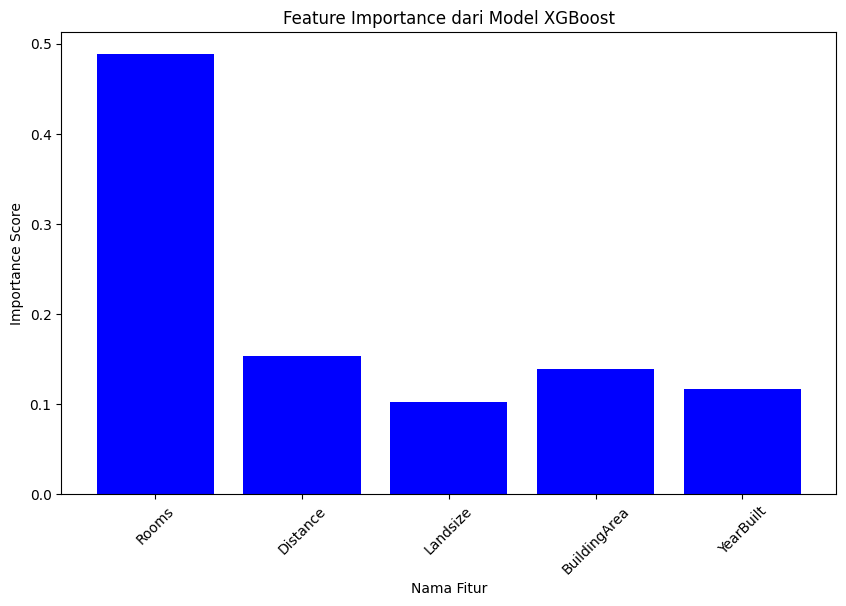

In [18]:
feature_importances = model_custom.feature_importances_
# Mengambil nilai kepentingan setiap fitur dari model yang sudah dilatih

plt.figure(figsize=(10, 6))
plt.bar(x=np.arange(len(feature_importances)), height=feature_importances, tick_label=X.columns, color='Blue')
plt.title('Feature Importance dari Model XGBoost')
plt.xlabel('Nama Fitur')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.show()
# Menampilkan grafik kepentingan fitur dari model


Grafik feature importance menunjukkan fitur-fitur yang memiliki pengaruh terbesar dalam prediksi model. Fitur dengan skor kepentingan lebih tinggi memberikan kontribusi yang lebih signifikan.

#Tree Structure Visualization

<Figure size 5000x2000 with 0 Axes>

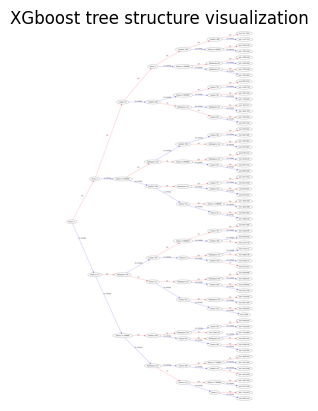

In [19]:
plt.figure(figsize=(50, 20))
plot_tree(model_custom, num_trees=0, rankdir='LR')
plt.title('XGboost tree structure visualization')
plt.show()
# Menampilkan gambaran struktur pohon keputusan dari model XGBoost


Struktur pohon XGBoost adalah gambaran visual dari proses pengambilan keputusan oleh model. Setiap pohon dalam XGBoost (yang merupakan gabungan dari berbagai pohon) mencerminkan serangkaian keputusan yang didasarkan pada fitur-fitur input.

#Learning Curve Visualization

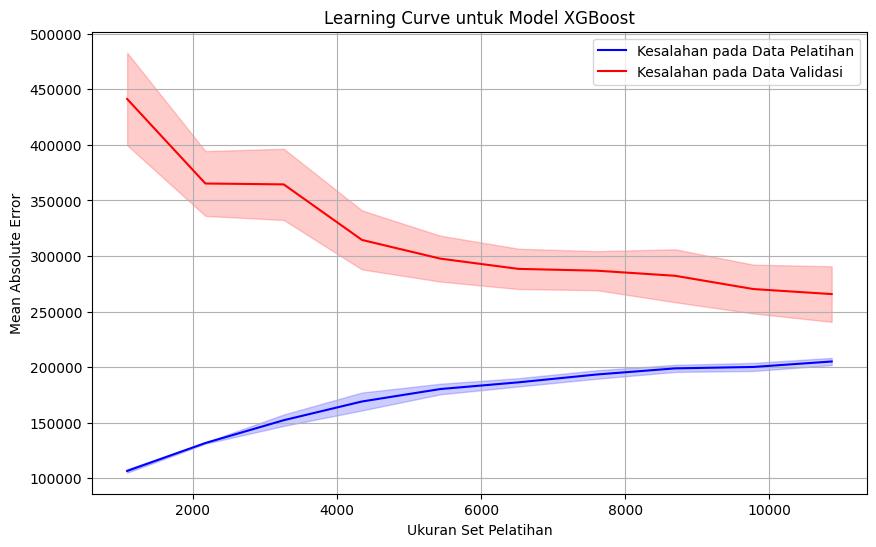

In [20]:
train_sizes, train_scores, valid_scores = learning_curve(
    XGBRegressor(n_estimators=90, learning_rate=0.1, random_state=42),  # Model XGBoost yang diterapkan
    X, y,  # Fitur dan target variabel
    train_sizes=np.linspace(0.1, 1.0, 10),  # Membagi data pelatihan dalam proporsi yang berbeda
    cv=5,  # Menggunakan teknik 5-fold cross-validation
    scoring='neg_mean_absolute_error',  # Menggunakan Mean Absolute Error sebagai metrik evaluasi
    n_jobs=-1  # Mengoptimalkan pemrosesan dengan menggunakan semua inti CPU
)

# Menghitung rata-rata dan deviasi standar dari skor untuk training dan validasi
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = -np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Membuat visualisasi Learning Curve untuk model XGBoost
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Kesalahan pada Data Pelatihan', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, valid_mean, label='Kesalahan pada Data Validasi', color='red')
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2, color='red')
plt.title('Learning Curve untuk Model XGBoost')
plt.xlabel('Ukuran Set Pelatihan')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid()
plt.show()


Learning Curve menggambarkan bagaimana kinerja model XGBoost berubah seiring dengan peningkatan jumlah data pelatihan.

Pada sumbu X, terlihat ukuran dataset pelatihan yang digunakan, sementara pada sumbu Y, tertera nilai Mean Absolute Error (MAE).
Kurva Training Error (berwarna biru) menunjukkan tingkat kesalahan model pada data pelatihan. Kurva ini cenderung menurun seiring bertambahnya data pelatihan, karena model memiliki lebih banyak data untuk dipelajari.
Kurva Validation Error (berwarna merah) menggambarkan kesalahan model pada data validasi, yang merepresentasikan kemampuannya dalam memprediksi data yang belum pernah dilihat sebelumnya.

Penafsiran kurva:

- Jika Validation Error lebih tinggi secara signifikan dibandingkan Training Error, ini menunjukkan adanya overfitting — model terlalu menyesuaikan diri dengan data pelatihan dan kesulitan dalam menggeneralisasi ke data baru.
- Jika Training Error dan Validation Error keduanya tinggi dan saling berdekatan, ini menandakan adanya underfitting — model kurang kompleks dan tidak mampu menangkap pola yang ada dalam data.

#Shap Values Visualization

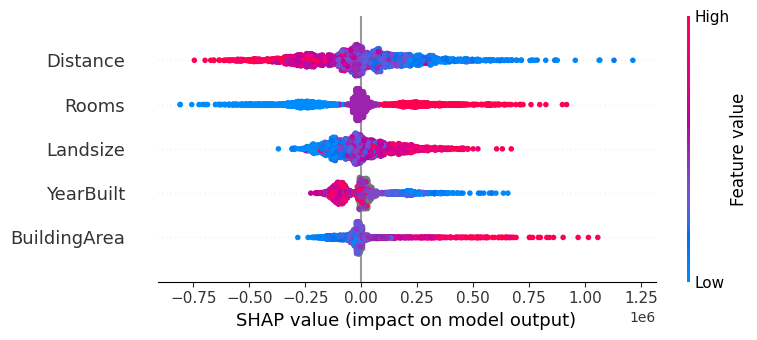

In [21]:
explainer = shap.TreeExplainer(model_custom)

shap_values = explainer.shap_values(X_valid)
# Menghitung nilai SHAP untuk dataset validasi

shap.summary_plot(shap_values, X_valid)
# Menampilkan visualisasi plot ringkasan SHAP

SHAP Summary Plot memberikan gambaran tentang kontribusi masing-masing fitur terhadap hasil prediksi model XGBoost. Pada grafik ini:

- Setiap titik menggambarkan nilai SHAP untuk suatu fitur pada satu data point.
- Sumbu x menunjukkan sejauh mana fitur memengaruhi prediksi, sementara warna menunjukkan nilai fitur (merah untuk nilai tinggi, biru untuk nilai rendah).
- Fitur yang terletak di bagian atas grafik memiliki pengaruh paling besar terhadap prediksi secara keseluruhan.
- Dengan grafik ini, kita dapat mengenali fitur-fitur yang paling berpengaruh pada prediksi model serta memahami bagaimana perubahan nilai fitur dapat memengaruhi hasil prediksi.

#Partial Dependence Plot Visualization

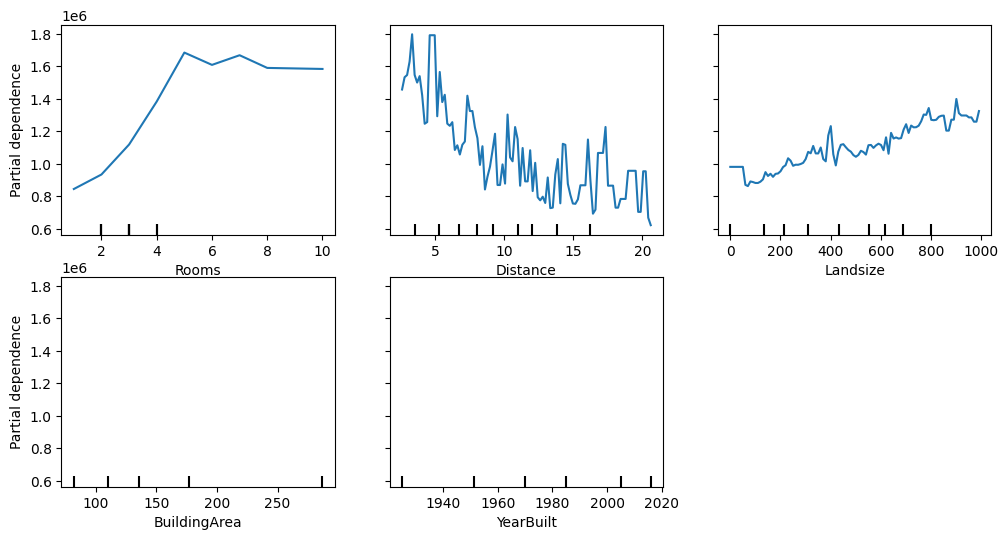

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(model, X_train, features=[0, 1, 2, 3, 4], feature_names=predictors, ax=ax)  # Membuat plot ketergantungan parsial untuk semua variabel fitur
plt.title('')
plt.show()
# Menampilkan visualisasi Partial Dependence Plot

Partial Dependence Plot (PDP) menggambarkan bagaimana perubahan rata-rata prediksi model dipengaruhi oleh variasi nilai suatu fitur, sementara fitur lainnya tetap tetap pada nilai konstan.

Sumbu x mewakili nilai fitur tertentu (misalnya, Rooms, Distance, Landsize, BuildingArea, YearBuilt), sedangkan sumbu y menunjukkan sejauh mana perubahan nilai fitur tersebut mempengaruhi prediksi rata-rata (Price). PDP berguna untuk memahami pengaruh setiap fitur terhadap target. Sebagai contoh, apakah peningkatan jumlah Rooms berpengaruh signifikan terhadap prediksi harga properti, atau bagaimana jarak (Distance) mempengaruhi hasil prediksi. Visualisasi ini sangat berguna dalam mengidentifikasi fitur-fitur yang memberikan kontribusi besar terhadap kinerja model.